<a href="https://colab.research.google.com/github/leusto/ciencia_de_dados/blob/main/exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise Exploratória de Dados**
##*Thayná Gomes da Silva*



###Case: Student Mental Health

Neste caso, vamos realizar uma pesquisa estatística para analisar como a saúde mental dos estudantes pode afetar seu desempenho acadêmico, medido pelo CGPA (Cumulative Grade Point Average). Utilizaremos um conjunto de dados disponível no Kaggle que contém informações sobre o CGPA dos estudantes juntamente com dados sobre sua sexualidade, saúde mental, se faz algum tratamento etc.

O objetivo desta atividade é fazer dois tipos de explorações sob os dados:

1) enriquecer o conjunto de dados (dataset) com o levantamento de metadados como dimensão, tipos de atributos e medidas de resumo;

2) explorar analiticamente o dataset com o uso de estatística descritiva (medida de tendência central, variabilidade) e métodos gráficos para se ter ideias de tipos de análises que podem ser realizadas. Como aqui se trata da primeira exploração de dados, a seguir serão definidas algumas propostas de análises com a finalidade de tornar os estudos mais bem direcionados. Nesse sentido, um case de estudo será definido e apresentado a seguir.

As bibliotecas utilizadas na solução deste case são:

In [ ]:
from sklearn import datasets
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

Neste case será usado um dataset disponível no kaggle, modelo cvs:

In [ ]:
student_mental_health = pd.read_csv("Student Mental health.csv")
print(student_mental_health)

               Timestamp Choose your gender   Age What is your course?  \
0         8/7/2020 12:02             Female  18.0          Engineering   
1         8/7/2020 12:04               Male  21.0    Islamic education   
2         8/7/2020 12:05               Male  19.0                  BIT   
3         8/7/2020 12:06             Female  22.0                 Laws   
4         8/7/2020 12:13               Male  23.0         Mathemathics   
..                   ...                ...   ...                  ...   
96   13/07/2020 19:56:49             Female  21.0                  BCS   
97   13/07/2020 21:21:42               Male  18.0          Engineering   
98   13/07/2020 21:22:56             Female  19.0             Nursing    
99   13/07/2020 21:23:57             Female  23.0     Pendidikan Islam   
100  18/07/2020 20:16:21               Male  20.0   Biomedical science   

    Your current year of Study What is your CGPA? Marital status  \
0                       year 1        3.00 

Os atributos deste dataset são:

Vamos alterar a coluna de "What is your CGPA?" para transformá-lo em um número decimal.

In [ ]:
# Função para extrair o último número após o hífen e converter em decimal
def extract_last_number(value):
    return float(value.split('-')[-1].strip())

In [ ]:
# Aplicando a função à coluna 'CGPA' e criando uma nova coluna 'CGPA_Decimal'
student_mental_health['CGPA_MAX'] = student_mental_health['What is your CGPA?'].apply(extract_last_number)
print(student_mental_health)

               Timestamp Choose your gender   Age What is your course?  \
0         8/7/2020 12:02             Female  18.0          Engineering   
1         8/7/2020 12:04               Male  21.0    Islamic education   
2         8/7/2020 12:05               Male  19.0                  BIT   
3         8/7/2020 12:06             Female  22.0                 Laws   
4         8/7/2020 12:13               Male  23.0         Mathemathics   
..                   ...                ...   ...                  ...   
96   13/07/2020 19:56:49             Female  21.0                  BCS   
97   13/07/2020 21:21:42               Male  18.0          Engineering   
98   13/07/2020 21:22:56             Female  19.0             Nursing    
99   13/07/2020 21:23:57             Female  23.0     Pendidikan Islam   
100  18/07/2020 20:16:21               Male  20.0   Biomedical science   

    Your current year of Study What is your CGPA? Marital status  \
0                       year 1        3.00 

In [ ]:
X = student_mental_health.iloc[:, :11]
y = student_mental_health['CGPA_MAX']
student_mental_health_df = pd.concat([X,y], axis=1)
student_mental_health_df
student_mental_health_df.columns = ['Timestamp','Gender','Age','Course','Year of Study', "CGPA", 'Marital', 'Depression', 'Anxiety', 'Panic attack', 'Treatment', 'CGPA_MAX']
print(student_mental_health_df)


               Timestamp  Gender   Age              Course Year of Study  \
0         8/7/2020 12:02  Female  18.0         Engineering        year 1   
1         8/7/2020 12:04    Male  21.0   Islamic education        year 2   
2         8/7/2020 12:05    Male  19.0                 BIT        Year 1   
3         8/7/2020 12:06  Female  22.0                Laws        year 3   
4         8/7/2020 12:13    Male  23.0        Mathemathics        year 4   
..                   ...     ...   ...                 ...           ...   
96   13/07/2020 19:56:49  Female  21.0                 BCS        year 1   
97   13/07/2020 21:21:42    Male  18.0         Engineering        Year 2   
98   13/07/2020 21:22:56  Female  19.0            Nursing         Year 3   
99   13/07/2020 21:23:57  Female  23.0    Pendidikan Islam        year 4   
100  18/07/2020 20:16:21    Male  20.0  Biomedical science        Year 2   

            CGPA Marital Depression Anxiety Panic attack Treatment  CGPA_MAX  
0    3.0

e os tipos dos atributos:

In [ ]:
student_mental_health.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
CGPA_MAX                                        float64
dtype: object

o conjunto de dados tem a seguinte dimensão

In [ ]:
student_mental_health.shape

(101, 12)

Para se ter um exemplo do conjunto de dados, apresenta-se os quatro primeiros conjuntos de dados do dataset:

In [ ]:
student_mental_health.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,CGPA_MAX
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,3.49
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No,3.49
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,3.49
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No,3.49
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No,3.49


Para fins de análise em muitas situações é importante manipular partes específicas do dataset. Apresenta-se a seguir algumas opções de seleção de dados.

A primeira é selecionando uma coluna do conjunto de dsdos por nome do atributo (dataframe):

In [ ]:
Age = student_mental_health_df["Age"]
print(Age)

0      18.0
1      21.0
2      19.0
3      22.0
4      23.0
       ... 
96     21.0
97     18.0
98     19.0
99     23.0
100    20.0
Name: Age, Length: 101, dtype: float64


De forma equivalente se pode manipular pelo indice da coluna (matricial):

In [ ]:
Age = student_mental_health_df.iloc[: ,2]
Age

0      18.0
1      21.0
2      19.0
3      22.0
4      23.0
       ... 
96     21.0
97     18.0
98     19.0
99     23.0
100    20.0
Name: Age, Length: 101, dtype: float64

Pode-se ainda selecionar mais de uma coluna do conjunto de dados:

In [ ]:
sel_cols = student_mental_health_df.iloc[:,[0,1]]
print(sel_cols)

               Timestamp  Gender
0         8/7/2020 12:02  Female
1         8/7/2020 12:04    Male
2         8/7/2020 12:05    Male
3         8/7/2020 12:06  Female
4         8/7/2020 12:13    Male
..                   ...     ...
96   13/07/2020 19:56:49  Female
97   13/07/2020 21:21:42    Male
98   13/07/2020 21:22:56  Female
99   13/07/2020 21:23:57  Female
100  18/07/2020 20:16:21    Male

[101 rows x 2 columns]


Podemos verificar se há valores ausentes no df:

In [ ]:
if student_mental_health_df.isna().any().any():
    print("Existem valores ausentes no DataFrame.")
else:
    print("Não há valores ausentes no DataFrame.")

Existem valores ausentes no DataFrame.


In [ ]:
missing_values = student_mental_health_df.isnull().sum()
print(missing_values)


Timestamp        0
Gender           0
Age              1
Course           0
Year of Study    0
CGPA             0
Marital          0
Depression       0
Anxiety          0
Panic attack     0
Treatment        0
CGPA_MAX         0
dtype: int64


In [ ]:
student_mental_health_df = student_mental_health_df.dropna()
missing_values = student_mental_health_df.isnull().sum()
print(missing_values)

Timestamp        0
Gender           0
Age              0
Course           0
Year of Study    0
CGPA             0
Marital          0
Depression       0
Anxiety          0
Panic attack     0
Treatment        0
CGPA_MAX         0
dtype: int64


In [ ]:
student_mental_health_df.shape

(100, 12)


De forma análoga a manipulação de atributos, pode-se manipular as linhas como segue o exemplo abaixo que seleciona os cinco primeiros conjuntos de dados e as duas primeiras colunas do dataset:

In [ ]:
sel_rows = student_mental_health_df.iloc[0:5,[0,1]]
print(sel_rows)

        Timestamp  Gender
0  8/7/2020 12:02  Female
1  8/7/2020 12:04    Male
2  8/7/2020 12:05    Male
3  8/7/2020 12:06  Female
4  8/7/2020 12:13    Male


Agora inicia-se a etapa de análise exploratória de dados. A primeira análise é feita por um resumo estatístico do conjunto de dados:

In [ ]:
student_mental_health_df.describe()

,Age,CGPA_MAX
count,100.00000,100.00000
mean,20.53000,3.64980
std,2.49628,0.44587
min,18.00000,1.99000
25%,18.00000,3.49000
50%,19.00000,3.49000
75%,23.00000,4.00000
max,24.00000,4.00000


Porém se pode fazer medidas específicas com cálculos de estatística exploratória. Separando um atributo do dataset para os exemplos:

In [ ]:
Age = student_mental_health_df["Age"]

Calculando a média:

In [ ]:
media_Age = np.mean(Age)
print(media_Age)

20.53


mediana:

In [ ]:
mediana_Age = np.median(Age)
print(mediana_Age)

19.0


variância

In [ ]:
variancia_Age = np.var(Age)
print(variancia_Age)

6.169099999999999


desvio padrão

In [ ]:
desvio_padrao_Age = np.std(Age)
print(desvio_padrao_Age)

2.483767299889424


Assim como é importante os cálculos de medias de resumo estatístico, também é importante se ter informações das faixas de valores. Por exemplo, valor minimo do atributo:

In [ ]:
Age_min = np.min(Age)
print(Age_min)

18.0


valor máximo

In [ ]:
Age_max = np.max(Age)
print(Age_max)

24.0


Agora se inicia a análise exploratória visual dos dados. A primeira é um gráfico de dispersão:

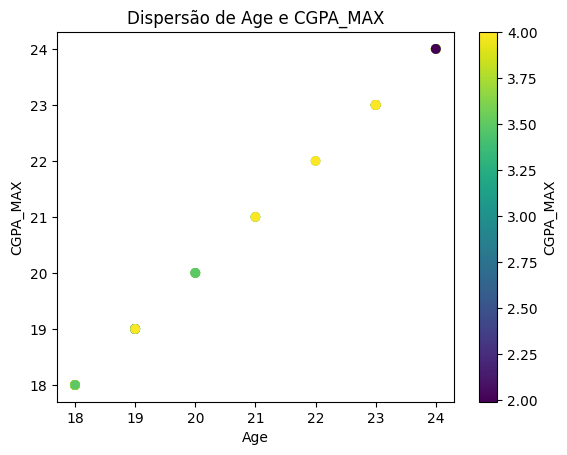

In [ ]:
X = student_mental_health_df.iloc[:, 2]  #'Age'
y = student_mental_health_df['CGPA_MAX']

plt.scatter(X, X, c=y)
plt.title("Dispersão de Age e CGPA_MAX")
plt.xlabel("Age")
plt.ylabel("CGPA_MAX")
plt.colorbar(label='CGPA_MAX')
plt.show()


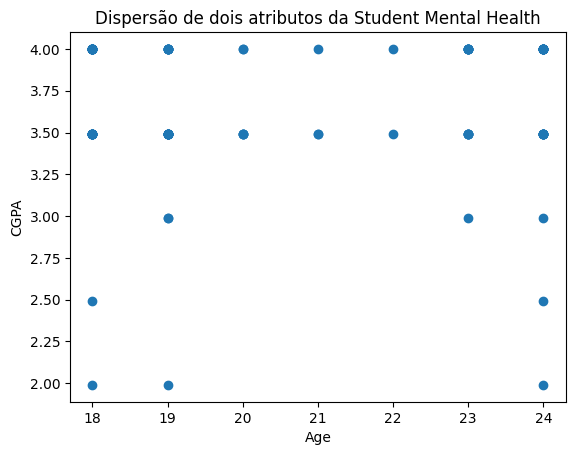

In [ ]:
plt.scatter(student_mental_health_df["Age"], student_mental_health_df["CGPA_MAX"], label=student_mental_health_df["Course"])
plt.title("Dispersão de dois atributos da Student Mental Health")
plt.xlabel("Age")
plt.ylabel("CGPA")
plt.show()


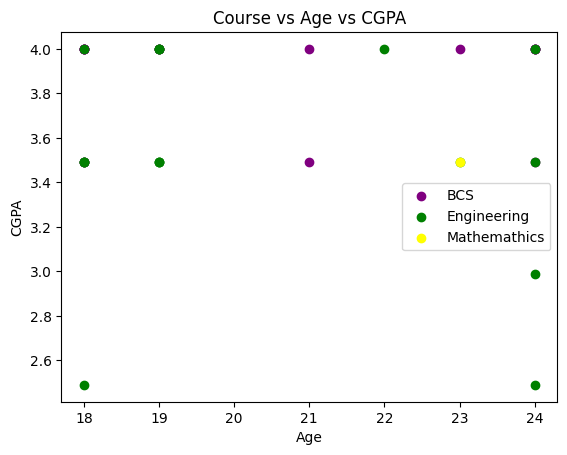

In [ ]:
BCS = student_mental_health_df[student_mental_health_df["Course"] == "BCS"]
Engineering = student_mental_health_df[student_mental_health_df["Course"] == "Engineering"]
Mathemathics = student_mental_health_df[student_mental_health_df["Course"] == "Mathemathics"]

fig, ax = plt.subplots()
points = ax.scatter(BCS["Age"], BCS["CGPA_MAX"], label="BCS", facecolor="purple")
ax.scatter(Engineering["Age"], Engineering["CGPA_MAX"], label="Engineering", facecolor="green")
ax.scatter(Mathemathics["Age"], Mathemathics["CGPA_MAX"], label="Mathemathics", facecolor="yellow")

ax.set_title("Course vs Age vs CGPA")
ax.set_xlabel("Age")
ax.set_ylabel("CGPA")
ax.legend()


Em outras análises se deseja saber a distribuição de um atributo específico:

{'whiskers': [<matplotlib.lines.Line2D at 0x7d921ea33700>,
 'caps': [<matplotlib.lines.Line2D at 0x7d921ea33c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d921ea33460>],
 'medians': [<matplotlib.lines.Line2D at 0x7d921ea32350>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d921ea800d0>],
 'means': []}

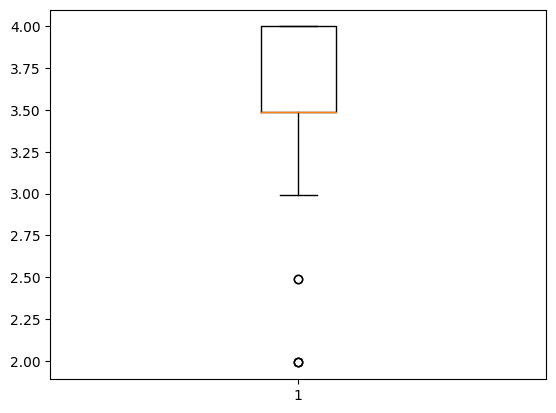

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(student_mental_health_df["CGPA_MAX"])


In [ ]:
count = np.histogram(student_mental_health_df["CGPA_MAX"], bins=3)
print(count[0])

[ 5  4 91]


(-1.0999999228848731,
 1.099999996327851,
 -1.0999997627733988,
 1.0999999288961293)

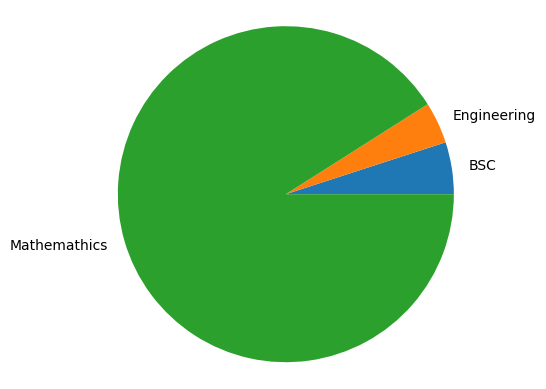

In [ ]:
labels = ['BSC','Engineering','Mathemathics']

fig, ax = plt.subplots()
ax.pie(count[0], labels = labels)
ax.axis('equal')

plt.hist(Age)
plt.show()

**Validação Cruzada e Análise de Desempenho**

In [ ]:
X = student_mental_health_df.iloc[:,[1, 3, 4]]
Y = student_mental_health_df['CGPA_MAX']

In [ ]:
svm_classifier = SVC(kernel='linear', C=1)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
accuracy_scores = []

In [ ]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Treinar o modelo SVM
    svm_classifier.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = svm_classifier.predict(X_test)

    # Calcular a acurácia e armazená-la na lista de pontuações
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)


KeyError: ignored

In [ ]:
for fold, accuracy in enumerate(accuracy_scores, start=1):
    print(f'Fold {fold}: Accuracy = {accuracy:.2f}')

In [ ]:
mean_accuracy = np.mean(accuracy_scores)
print(f'Mean Accuracy: {mean_accuracy:.2f}')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
svm_classifier = SVC(kernel='linear', C=1)


In [ ]:
cross_val_scores = cross_val_score(svm_classifier, X_train, y_train, cv=5)


ValueError: ignored

In [ ]:
svm_classifier.fit(X_train, y_train)

In [ ]:
y_pred = svm_classifier.predict(X_test)


In [ ]:
confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(confusion)


#**Exercícios**:

Referências

https://www.w3schools.com/python/python_examples.asp

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

https://stackabuse.com/matplotlib-pie-chart-tutorial-and-examples/

https://numpy.org/doc/stable/reference/generated/numpy.histogram.html

https://www.tutorialspoint.com/numpy/numpy_histogram_using_matplotlib.htm

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html

https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

https://www.w3schools.com/python/ref_string_count.asp


Instalação do Spyder

https://docs.spyder-ide.org/current/installation.html

https://github.com/spyder-ide/spyder-notebook

https://docs.spyder-ide.org/5/plugins/notebook.html

https://python.org.br/instalacao-mac/#:~:text=Instala%C3%A7%C3%A3o,de%20pacotes%20pip%20e%20homebrew.

https://python-guide-pt-br.readthedocs.io/pt_BR/latest/starting/install3/osx.html

https://docs.spyder-ide.org/current/installation.html

https://docs.spyder-ide.org/current/installation.html